In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

## Data Preprocessing
Before clustering, we need to preprocess the data:
 1) Merge the customer profile and transaction data based on a common key (e.g., CustomerID).
 2) Handle missing values or outliers.
 3) Normalize/scale the data if necessary, especially for algorithms sensitive to scale (like k-means).

In [4]:
# Merge the two datasets on a common column, e.g., 'CustomerID'
data = pd.merge(customers, transactions, on='CustomerID')

# Handle missing values (e.g., by filling with the mean or median, or dropping rows/columns)
data.fillna(0)

# Scale numerical features for clustering algorithms that require scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))


## Customer Segmentation

### Choose a Clustering Algorithm
We will apply a clustering algorithm to segment the customers. For this example, we can use K-Means Clustering or DBSCAN, both of which are common techniques. You can choose between them based on the nature of your data.

Example: K-Means Clustering
We will apply k-means clustering, which requires selecting the number of clusters (k). We can use the Elbow Method or Silhouette Score to determine the optimal number of clusters.

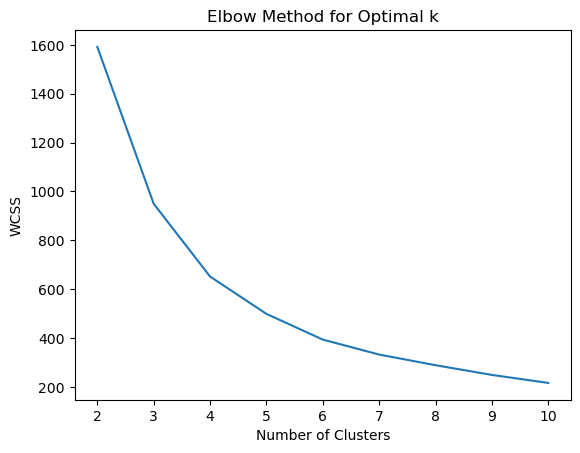

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(2, 11):  # Testing k between 2 and 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Apply Clustering and Assign Labels
Once we decide on the number of clusters, we will apply the chosen clustering algorithm and assign the cluster labels to each customer.

In [8]:
# Apply KMeans clustering with the chosen number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the data
data['Cluster'] = clusters


### Evaluate the Clustering
We will calculate several clustering metrics, including the Davies-Bouldin Index (DBI), which measures the average similarity ratio of each cluster with the cluster that is most similar to it.

In [10]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"DB Index: {db_index}")


DB Index: 0.7517439301142246


### Visualize the Clusters

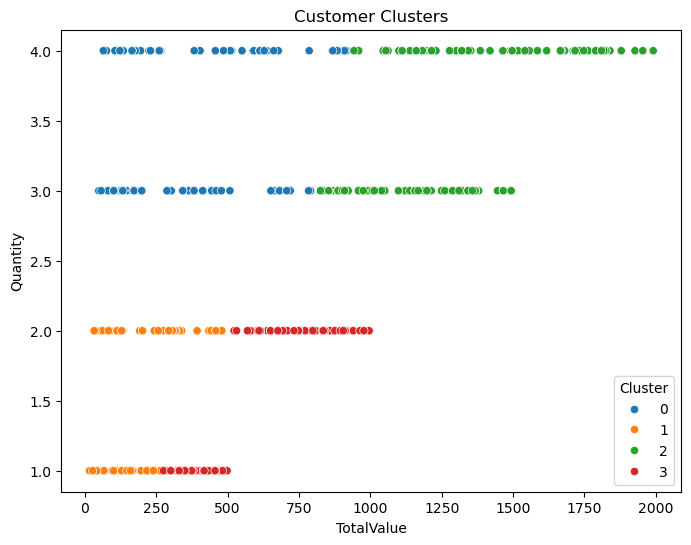

In [12]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="TotalValue", y="Quantity", hue="Cluster", palette="tab10")
plt.title("Customer Clusters")
plt.savefig("customer_clusters.png")
plt.show()


### Additional Clustering Metrics
Other clustering metrics you can calculate include:

 - Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.
 - Inertia: Measures the sum of squared distances to the nearest cluster center (for KMeans)

In [14]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.46677604262355504
